In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn import metrics
from sklearn import metrics

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data=pd.read_csv("german_credit.csv")
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
data_lbl = data.pop('default')
data_lbl.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [5]:
data.shape

(1000, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000 non-null object
people_under_maintenance      100

In [7]:
# Lets build a Ensemble model but need to modify the dataset first
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
for features in data.columns:
    if data[features].dtypes=='object':
        temp=pd.get_dummies(data[features],prefix=features)#,drop_first=True)
        data=data.join(temp)

In [9]:
# Print Shape of model data
data.shape

(1000, 74)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
account_check_status                                                          1000 non-null object
duration_in_month                                                             1000 non-null int64
credit_history                                                                1000 non-null object
purpose                                                                       1000 non-null object
credit_amount                                                                 1000 non-null int64
savings                                                                       1000 non-null object
present_emp_since                                                             1000 non-null object
installment_as_income_perc                                                    1000 non-null int64
personal_status_sex                                                           1000 non-null object
other_

In [11]:
data.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,1,0,0,1,0,0,0,1,0,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,1,0,0,1,0,0,1,0,0,1
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,1,0,0,0,0,1,1,0,0,1
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,0,0,0,1,0,0,1,0,0,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,0,0,0,1,0,0,1,0,0,1


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
account_check_status_0 <= ... < 200 DM,1000.0,0.269,0.443662,0.0,0.0,0.0,1.00,1.0
account_check_status_< 0 DM,1000.0,0.274,0.446232,0.0,0.0,0.0,1.00,1.0
account_check_status_>= 200 DM / salary assignments for at least 1 year,1000.0,0.063,0.243085,0.0,0.0,0.0,0.00,1.0


In [13]:
data.isnull().sum()

account_check_status                                                          0
duration_in_month                                                             0
credit_history                                                                0
purpose                                                                       0
credit_amount                                                                 0
savings                                                                       0
present_emp_since                                                             0
installment_as_income_perc                                                    0
personal_status_sex                                                           0
other_debtors                                                                 0
present_res_since                                                             0
property                                                                      0
age                                     

In [14]:
data.isna().sum()

account_check_status                                                          0
duration_in_month                                                             0
credit_history                                                                0
purpose                                                                       0
credit_amount                                                                 0
savings                                                                       0
present_emp_since                                                             0
installment_as_income_perc                                                    0
personal_status_sex                                                           0
other_debtors                                                                 0
present_res_since                                                             0
property                                                                      0
age                                     

In [15]:
data[~data.applymap(np.isreal).all(1)]

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,1,0,0,1,0,0,0,1,0,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,1,0,0,1,0,0,1,0,0,1
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,1,0,0,0,0,1,1,0,0,1
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,0,0,0,1,0,0,1,0,0,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,0,0,0,1,0,0,1,0,0,1
5,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,...,0,0,0,0,0,1,0,1,0,1
6,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,none,...,1,0,0,1,0,0,1,0,0,1
7,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,...,0,1,1,0,0,0,0,1,0,1
8,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,1,0,0,0,0,1,1,0,0,1
9,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,none,...,1,0,1,0,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [16]:
data.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,-0.076455,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,-0.100510,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,-0.041591,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,-0.064303,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,0.037504,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,-0.040213,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,-0.008700,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,-0.157296,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,-0.159297,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.157296,-0.159297,1.000000,...,0.018934,-0.035183,-0.015346,-0.022932,0.073347,1.440549e-02,0.028955,-0.028955,0.036392,-0.036392


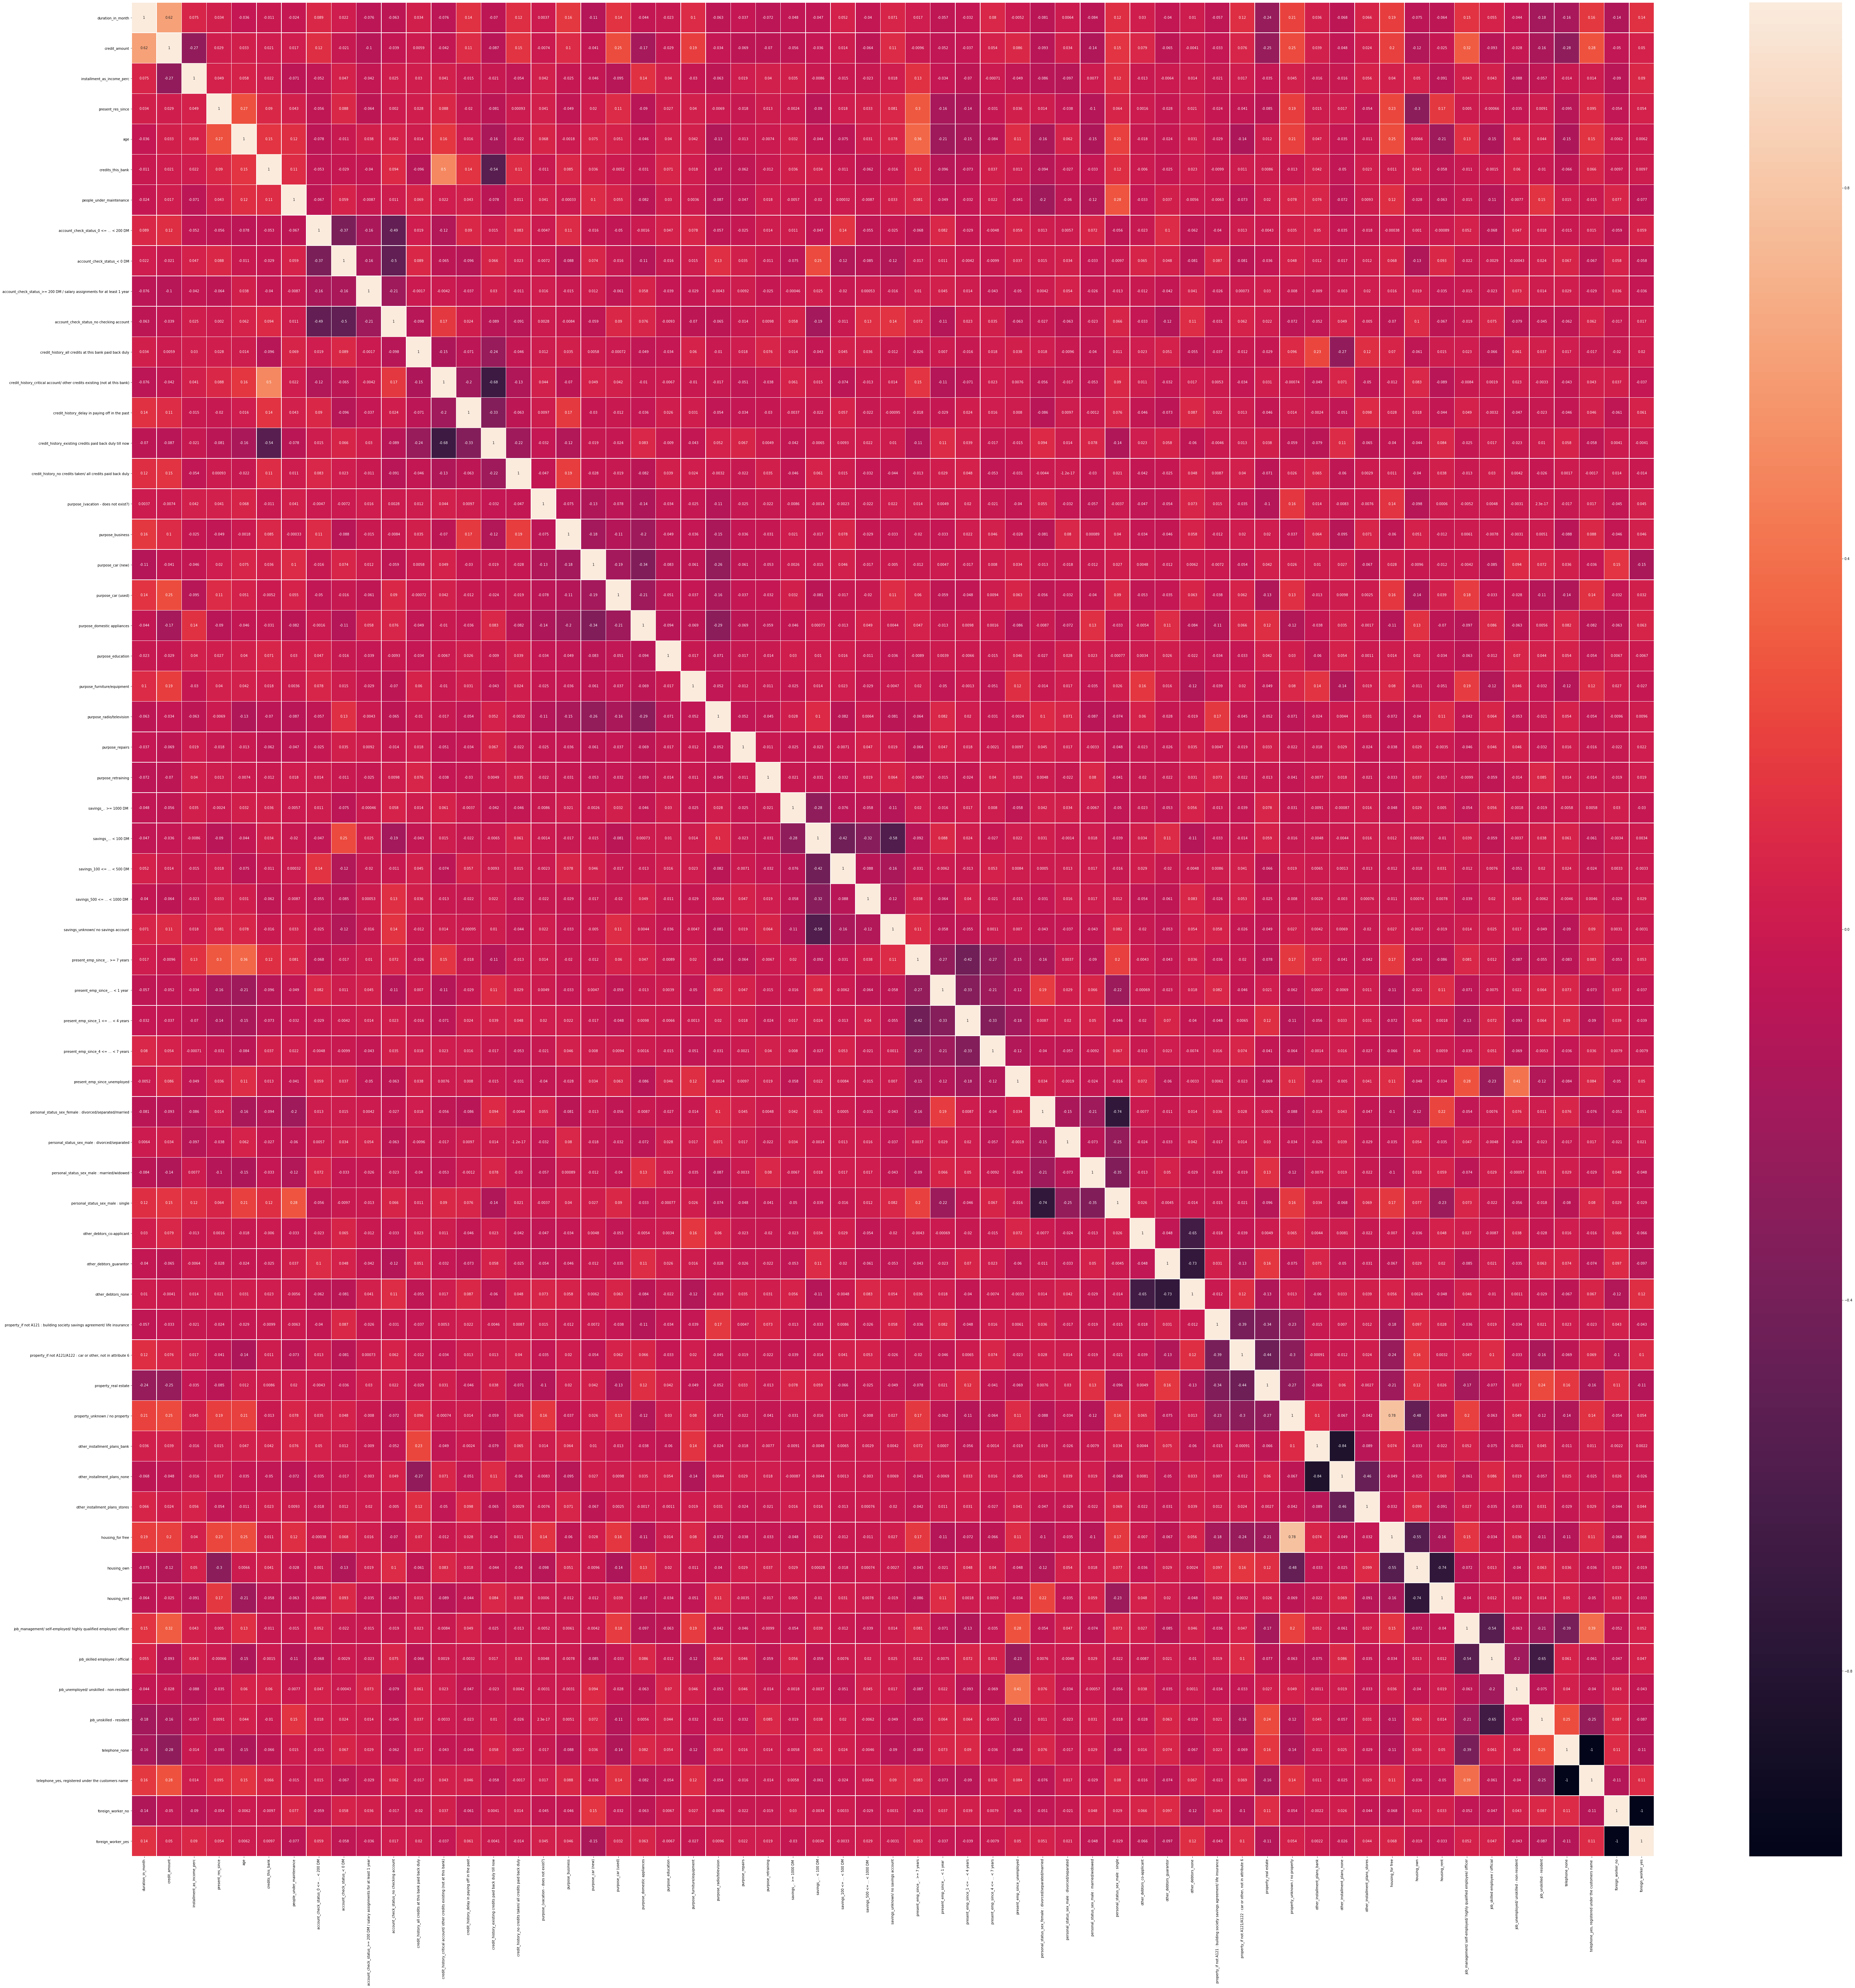

In [17]:
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

### Drop the original variables which are converted to dummy

In [26]:
data=data.drop(['account_check_status', 'credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'],axis = 1)

In [27]:
data.shape

(1000, 61)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [28]:
from sklearn.model_selection import train_test_split
Y=data_lbl
X=data
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [29]:
X_train

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
822,36,2712,2,2,41,1,2,0,1,0,...,1,0,0,1,0,0,1,0,0,1
188,12,674,4,1,20,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
251,12,2251,1,2,46,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,1
71,7,730,4,2,46,2,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
664,6,1047,2,4,50,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,1
418,21,2782,1,2,31,1,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
336,13,2101,2,4,23,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
328,36,4473,4,2,31,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
350,9,1236,1,4,23,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
909,9,3195,1,2,33,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1


In [30]:
X_test

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
778,36,5711,4,2,38,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
334,24,4110,3,4,23,2,2,0,1,0,...,0,1,0,1,0,0,1,0,0,1
271,12,1402,3,4,37,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
802,20,4272,1,4,24,2,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
216,18,3104,3,1,31,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
408,24,3235,3,2,26,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
812,36,9629,4,4,24,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
94,12,1318,4,4,54,1,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
487,24,3757,4,4,62,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
170,15,950,4,3,33,2,2,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [31]:
y_train

822    1
188    1
251    0
71     0
664    0
418    0
336    0
328    0
350    0
909    0
928    0
986    0
375    1
557    1
684    0
451    0
809    1
505    1
677    1
833    0
526    0
480    0
446    1
218    0
239    0
752    0
525    0
192    1
795    0
191    1
      ..
787    0
6      0
250    0
823    0
75     0
512    0
940    0
391    0
895    0
432    0
68     1
167    0
904    0
730    0
554    0
366    0
345    0
584    0
535    1
398    1
185    0
348    0
615    0
919    1
211    0
579    0
502    0
537    0
196    0
175    1
Name: default, Length: 700, dtype: int64

In [32]:
y_test

778    0
334    1
271    0
802    0
216    0
408    0
812    1
94     0
487    0
170    1
24     0
242    1
542    1
930    0
886    0
426    0
125    0
453    0
650    0
913    0
168    0
776    0
572    0
848    0
875    0
590    0
25     0
484    0
705    0
889    0
      ..
655    0
81     0
666    0
983    1
900    1
66     0
732    0
656    1
935    1
988    0
510    1
513    0
64     0
734    0
264    0
864    1
463    0
498    0
20     0
367    0
768    0
696    0
719    0
578    1
261    0
652    1
720    1
806    0
570    1
459    0
Name: default, Length: 300, dtype: int64

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rf = rf.fit(X_train, y_train)

In [34]:
test_pred = rf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [35]:
print(metrics.confusion_matrix(y_test, test_pred))

[[204  13]
 [ 47  36]]


In [36]:
model_score = rf.score(X_test, y_test)
print(model_score)

0.8


### Q6 Show the list of the features importance( 1 Marks)

In [37]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"],index = X_train.columns))

                                                         Imp
duration_in_month                                   0.075498
credit_amount                                       0.101343
installment_as_income_perc                          0.034435
present_res_since                                   0.035781
age                                                 0.079248
credits_this_bank                                   0.018337
people_under_maintenance                            0.013998
account_check_status_0 <= ... < 200 DM              0.016636
account_check_status_< 0 DM                         0.031259
account_check_status_>= 200 DM / salary assignm...  0.009108
account_check_status_no checking account            0.049726
credit_history_all credits at this bank paid ba...  0.008726
credit_history_critical account/ other credits ...  0.017782
credit_history_delay in paying off in the past      0.008886
credit_history_existing credits paid back duly ...  0.013122
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
# Use below values
num_folds = 10
seed = 77

In [40]:
#Validate the Random Forest model build above using k fold

In [41]:
kfold=KFold(n_splits=num_folds,random_state=seed)

In [42]:
rfc_cv_score=cross_val_score(rf,X_train, y_train, cv=10)
rfc_cv_score

array([0.77464789, 0.69014085, 0.76056338, 0.74285714, 0.7       ,
       0.75714286, 0.67142857, 0.72463768, 0.75362319, 0.75362319])

In [43]:
#Calculate Mean score

In [44]:
rfc_cv_score.mean()

0.7328664742075641

In [45]:
# Calculate score standard deviation using std()

In [46]:
rfc_cv_score.std()

0.03288108442568863

In [53]:
scores = model_selection.cross_validate(rf, X_train, y_train, cv=10, return_train_score=True)
print('Train scores:')
print(scores['train_score'])
print('Test scores:')
print(scores['test_score'])

Train scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test scores:
[0.77464789 0.69014085 0.76056338 0.74285714 0.7        0.75714286
 0.67142857 0.72463768 0.75362319 0.75362319]


In [54]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [56]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=rf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [57]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=2,
                                              oob_score=False,
                                              random_state=9999, verbose=0,
                                     

In [58]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 300}


# Q8 Print the confusion matrix( 1 Marks)

In [47]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
metrics.confusion_matrix(Y,y_pred)

array([[648,  52],
       [179, 121]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [48]:
#Calculate Recall

Recall_defaulter=648/(648+52)
print(Recall_defaulter)

Recall_nondefaulter=121/(179+121)
print(Recall_nondefaulter)

0.9257142857142857
0.4033333333333333


In [49]:
#Calculate Precision
Precision_defaulter=648/(648+179)
print(Precision_defaulter)

Precision_nondefaulter=121/(121+52)
print(Precision_nondefaulter)

0.7835550181378477
0.6994219653179191


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [50]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [51]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf.fit(X_, y_)
    y_pred = rf.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [52]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.788
Standard deviation:  0.01492201952373293
